In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as datareader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,MaxPooling2D

In [2]:
data = datareader.DataReader('TCS.NS','yahoo',start='1995-01-01',end='2021-05-30')
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-08-12,40.000000,38.724998,38.724998,39.700001,212976.0,29.583549
2002-08-13,40.387501,38.875000,39.750000,39.162498,153576.0,29.183029
2002-08-14,39.250000,35.724998,39.250000,36.462502,822776.0,27.171043
2002-08-15,36.462502,36.462502,36.462502,36.462502,0.0,27.171043
2002-08-16,38.000000,35.750000,36.275002,36.375000,811856.0,27.105835
2002-08-19,36.674999,35.137501,36.674999,35.474998,205880.0,26.435177
2002-08-20,38.724998,35.487499,35.724998,36.462502,3773624.0,27.171043
2002-08-21,39.200001,36.525002,38.474998,38.250000,3011064.0,28.503036
2002-08-22,41.575001,39.312500,39.512501,39.900002,6732480.0,29.732599


In [3]:
data.to_csv("C:/Users/Rachit/Jupyter_notebook/datasets/stock_market.csv")

In [4]:
df = data.filter(['Close'])
df.head()

,Close
Date,
2002-08-12,39.700001
2002-08-13,39.162498
2002-08-14,36.462502
2002-08-15,36.462502
2002-08-16,36.375000


In [5]:
df.isnull().sum(),print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4662 entries, 2002-08-12 to 2021-05-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4662 non-null   float64
dtypes: float64(1)
memory usage: 72.8 KB
None


(Close    0
 dtype: int64,
 None)

In [6]:
print(df.shape)
df = df.values.reshape(df.shape[0],df.shape[1],1)
print(df.shape)

(4662, 1)
(4662, 1, 1)


In [7]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(df.reshape(-1,1))
print(len(scaled_data))

4662


In [8]:
train_len = int(len(scaled_data)*0.65)
test_len = len(scaled_data)-train_len

train_data = scaled_data[0:train_len]
test_data = scaled_data[train_len-60:]

In [9]:
train_data.shape,test_data.shape

((3030, 1), (1692, 1))

In [11]:
x_train = []
y_train = []

for i in range(60,train_len):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
len(x_train)

2970

In [12]:
x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])
    
x_test,y_test = np.array(x_test),np.array(y_test)

In [13]:
x_train,y_train = np.array(x_train), np.array(y_train)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [40]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 33,201
Trainable params: 33,201
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train,y_train,batch_size=5,epochs=1,verbose=1)

Train on 2970 samples
2970/2970 [==============================] - 38s 13ms/sample - loss: 7.8642e-05


In [ ]:
train_predict = model.predict(x_train)
print(train_predict)

In [ ]:
train_predictions  = scalar.inverse_transform(train_predict)
print(train_predictions)

In [ ]:
predictions = model.predict(x_test)
print(predictions)

In [46]:
loss = np.sqrt(mean_squared_error(y_test,predictions))
print(loss)

0.0838898645909936


In [47]:
predictions.shape, train_predictions.shape

((1632, 1), (2970, 1))

In [48]:
train = data[:train_len]
valid = data[train_len:]
valid['prediction'] = scalar.inverse_transform(predictions)

C:\Users\Rachit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


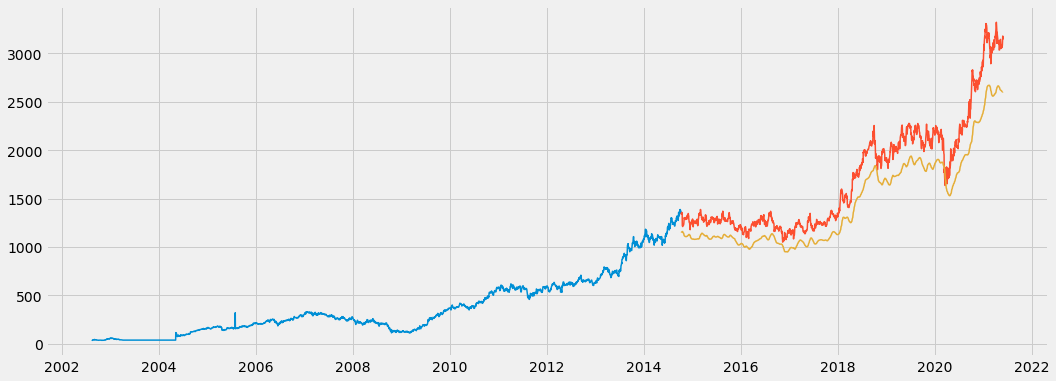

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.plot(train['Close'],linewidth=1.5)
plt.plot(valid[['Close','prediction']],linewidth=1.5)
plt.show()